   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 74.4 MB/s eta 0:00:00
PyTorch: 2.10.0+cu128 | MONAI: 1.5.2
GPU: NVIDIA A100-SXM4-80GB | VRAM: 85.1 GB
Device: cuda
→ A100 config: batch=4, accum=4, rank=64, no grad_ckpt
Effective batch: 16
LoRA: rank=64, alpha=64.0
Epochs: 100, restarts every 25
Mounted at /content/drive
Starting fresh training


Downloading...
From (original): https://drive.google.com/uc?id=1UAmWL88roYR7wKlnApw5Bcuzf2iQgk6_
From (redirected): https://drive.google.com/uc?id=1UAmWL88roYR7wKlnApw5Bcuzf2iQgk6_&confirm=t&uuid=3fa07d68-f7bc-4f35-97c6-171f54ea8914
To: /content/medsam_vit_b.pth
100%|██████████| 375M/375M [00:05<00:00, 62.6MB/s]


✓ Med-SAM: 375 MB


100%|██████████| 8.17G/8.17G [06:29<00:00, 22.5MB/s]

Extracting files...


Downloaded to: /root/.cache/kagglehub/datasets/farahmo/wmh-dataset/versions/1
Filtered: 580 files
Backing up zip to Drive...
✓ Backed up
Data: /content/wmh_flair_only
Found 60 subjects
  Singapore: 30
  Utrecht: 30
Generating split (seed=42):
  Singapore   : 21 tr, 4 val, 5 test
  Utrecht     : 21 tr, 4 val, 5 test
Total: 42 / 8 / 10
Building datasets...

Train:
    [1/42] Singapore_97 — 68 slices
    [5/42] Singapore_78 — 352 slices
    [10/42] Singapore_70 — 723 slices
    [15/42] Singapore_81 — 1066 slices
    [20/42] Singapore_73 — 1430 slices
    [25/42] Utrecht_48 — 1799 slices
    [30/42] Utrecht_28 — 2180 slices
    [35/42] Utrecht_13 — 2635 slices
    [40/42] Utrecht_45 — 3002 slices
  [TRAIN] 3147 slices (les:2907, bg:240)

Val:
    [1/8] Singapore_96 — 90 slices
    [5/8] Utrecht_40 — 396 slices
  [VAL] 682 slices (les:606, bg:76)

Test:
    [1/10] Singapore_77 — 79 slices
    [5/10] Singapore_76 — 388 slices
    [10/10] Utrecht_22 — 800 slices
  [TEST] 800 slices (les:693, 

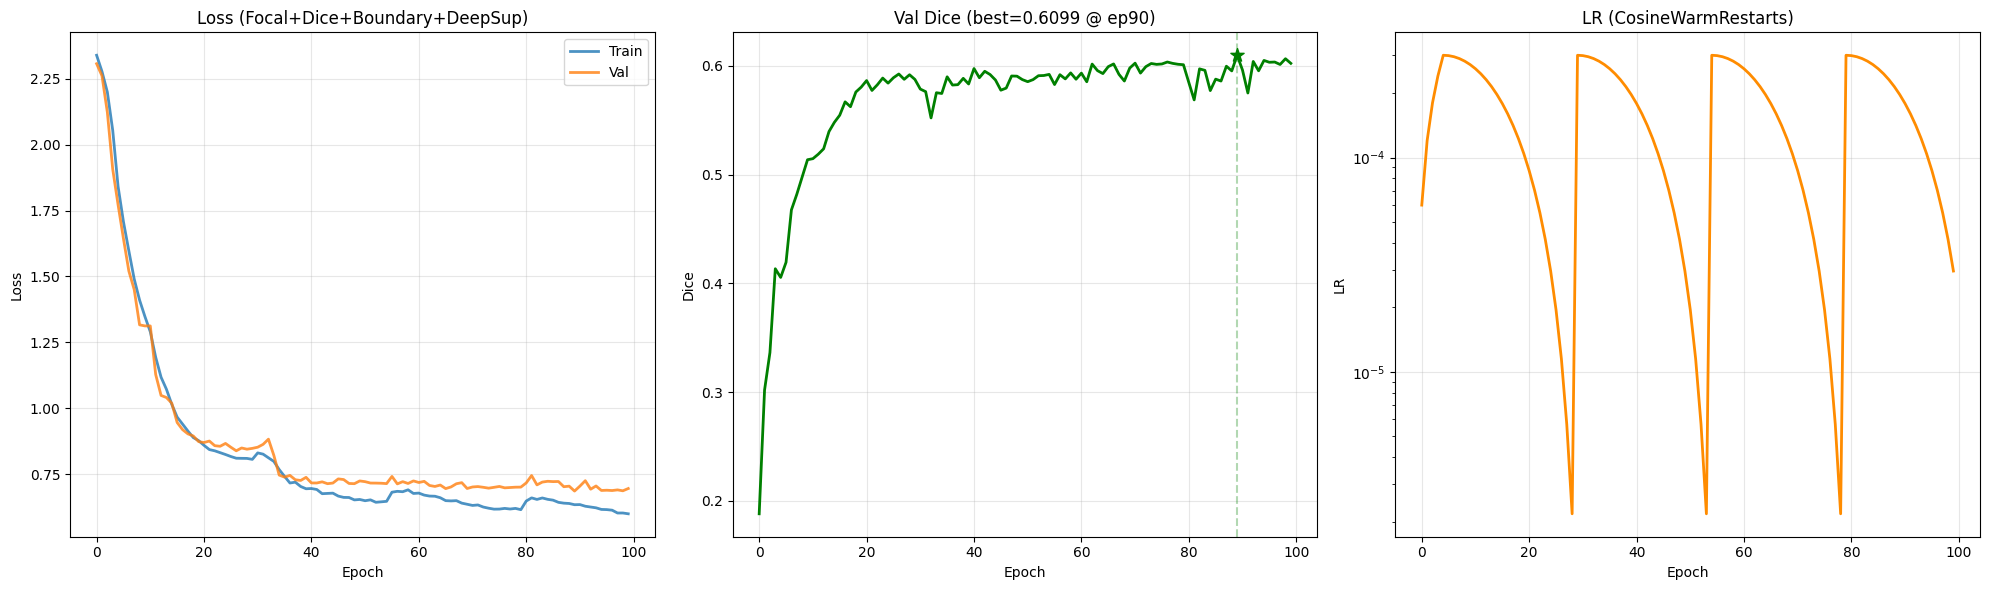


  Threshold Sweep — 8 subjects (no TTA)

  [1/8] Singapore_96 (3.2s)
  [2/8] Singapore_88 (3.1s)
  [3/8] Singapore_99 (3.1s)
  [4/8] Singapore_90 (3.2s)
  [5/8] Utrecht_40 (3.3s)
  [6/8] Utrecht_26 (3.2s)
  [7/8] Utrecht_38 (3.1s)
  [8/8] Utrecht_47 (3.1s)

Sweeping 17 thresholds...
  thr=0.10 │ Raw:0.7361 │ Filt:0.7361
  thr=0.15 │ Raw:0.7444 │ Filt:0.7444
  thr=0.20 │ Raw:0.7504 │ Filt:0.7504
  thr=0.25 │ Raw:0.7560 │ Filt:0.7560
  thr=0.30 │ Raw:0.7604 │ Filt:0.7605
  thr=0.35 │ Raw:0.7629 │ Filt:0.7631
  thr=0.40 │ Raw:0.7653 │ Filt:0.7652
  thr=0.45 │ Raw:0.7676 │ Filt:0.7676
  thr=0.50 │ Raw:0.7703 │ Filt:0.7703
  thr=0.55 │ Raw:0.7725 │ Filt:0.7722
  thr=0.60 │ Raw:0.7742 │ Filt:0.7736
  thr=0.65 │ Raw:0.7743 │ Filt:0.7735
  thr=0.70 │ Raw:0.7738 │ Filt:0.7727
  thr=0.75 │ Raw:0.7715 │ Filt:0.7705
  thr=0.80 │ Raw:0.7685 │ Filt:0.7670
  thr=0.85 │ Raw:0.7648 │ Filt:0.7631
  thr=0.90 │ Raw:0.7592 │ Filt:0.7574

  Best raw:  0.65 → 0.7743
  Best filt: 0.60 → 0.7736

CC size sweep

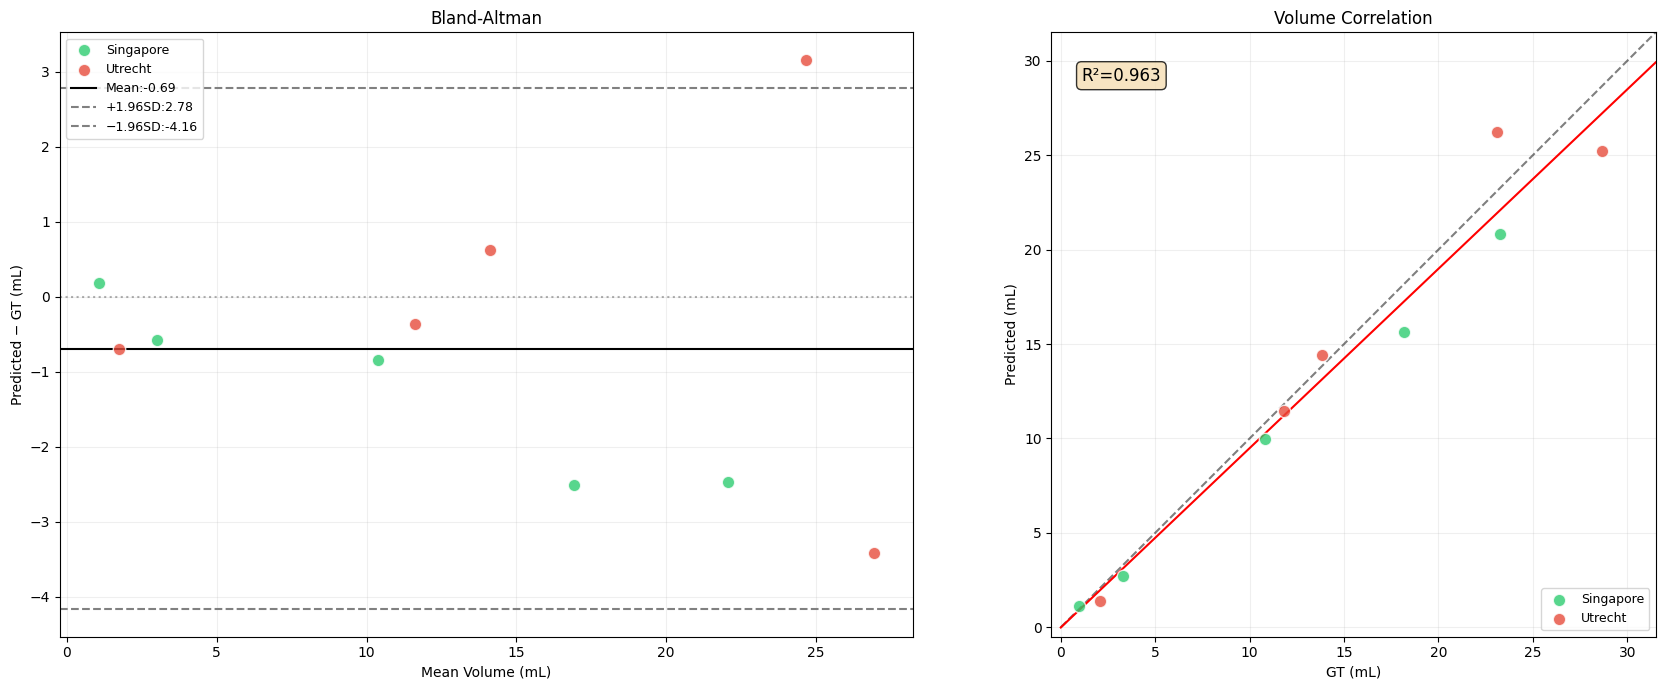

  Bias:-0.693mL | 95%LoA:[-4.16,2.78]


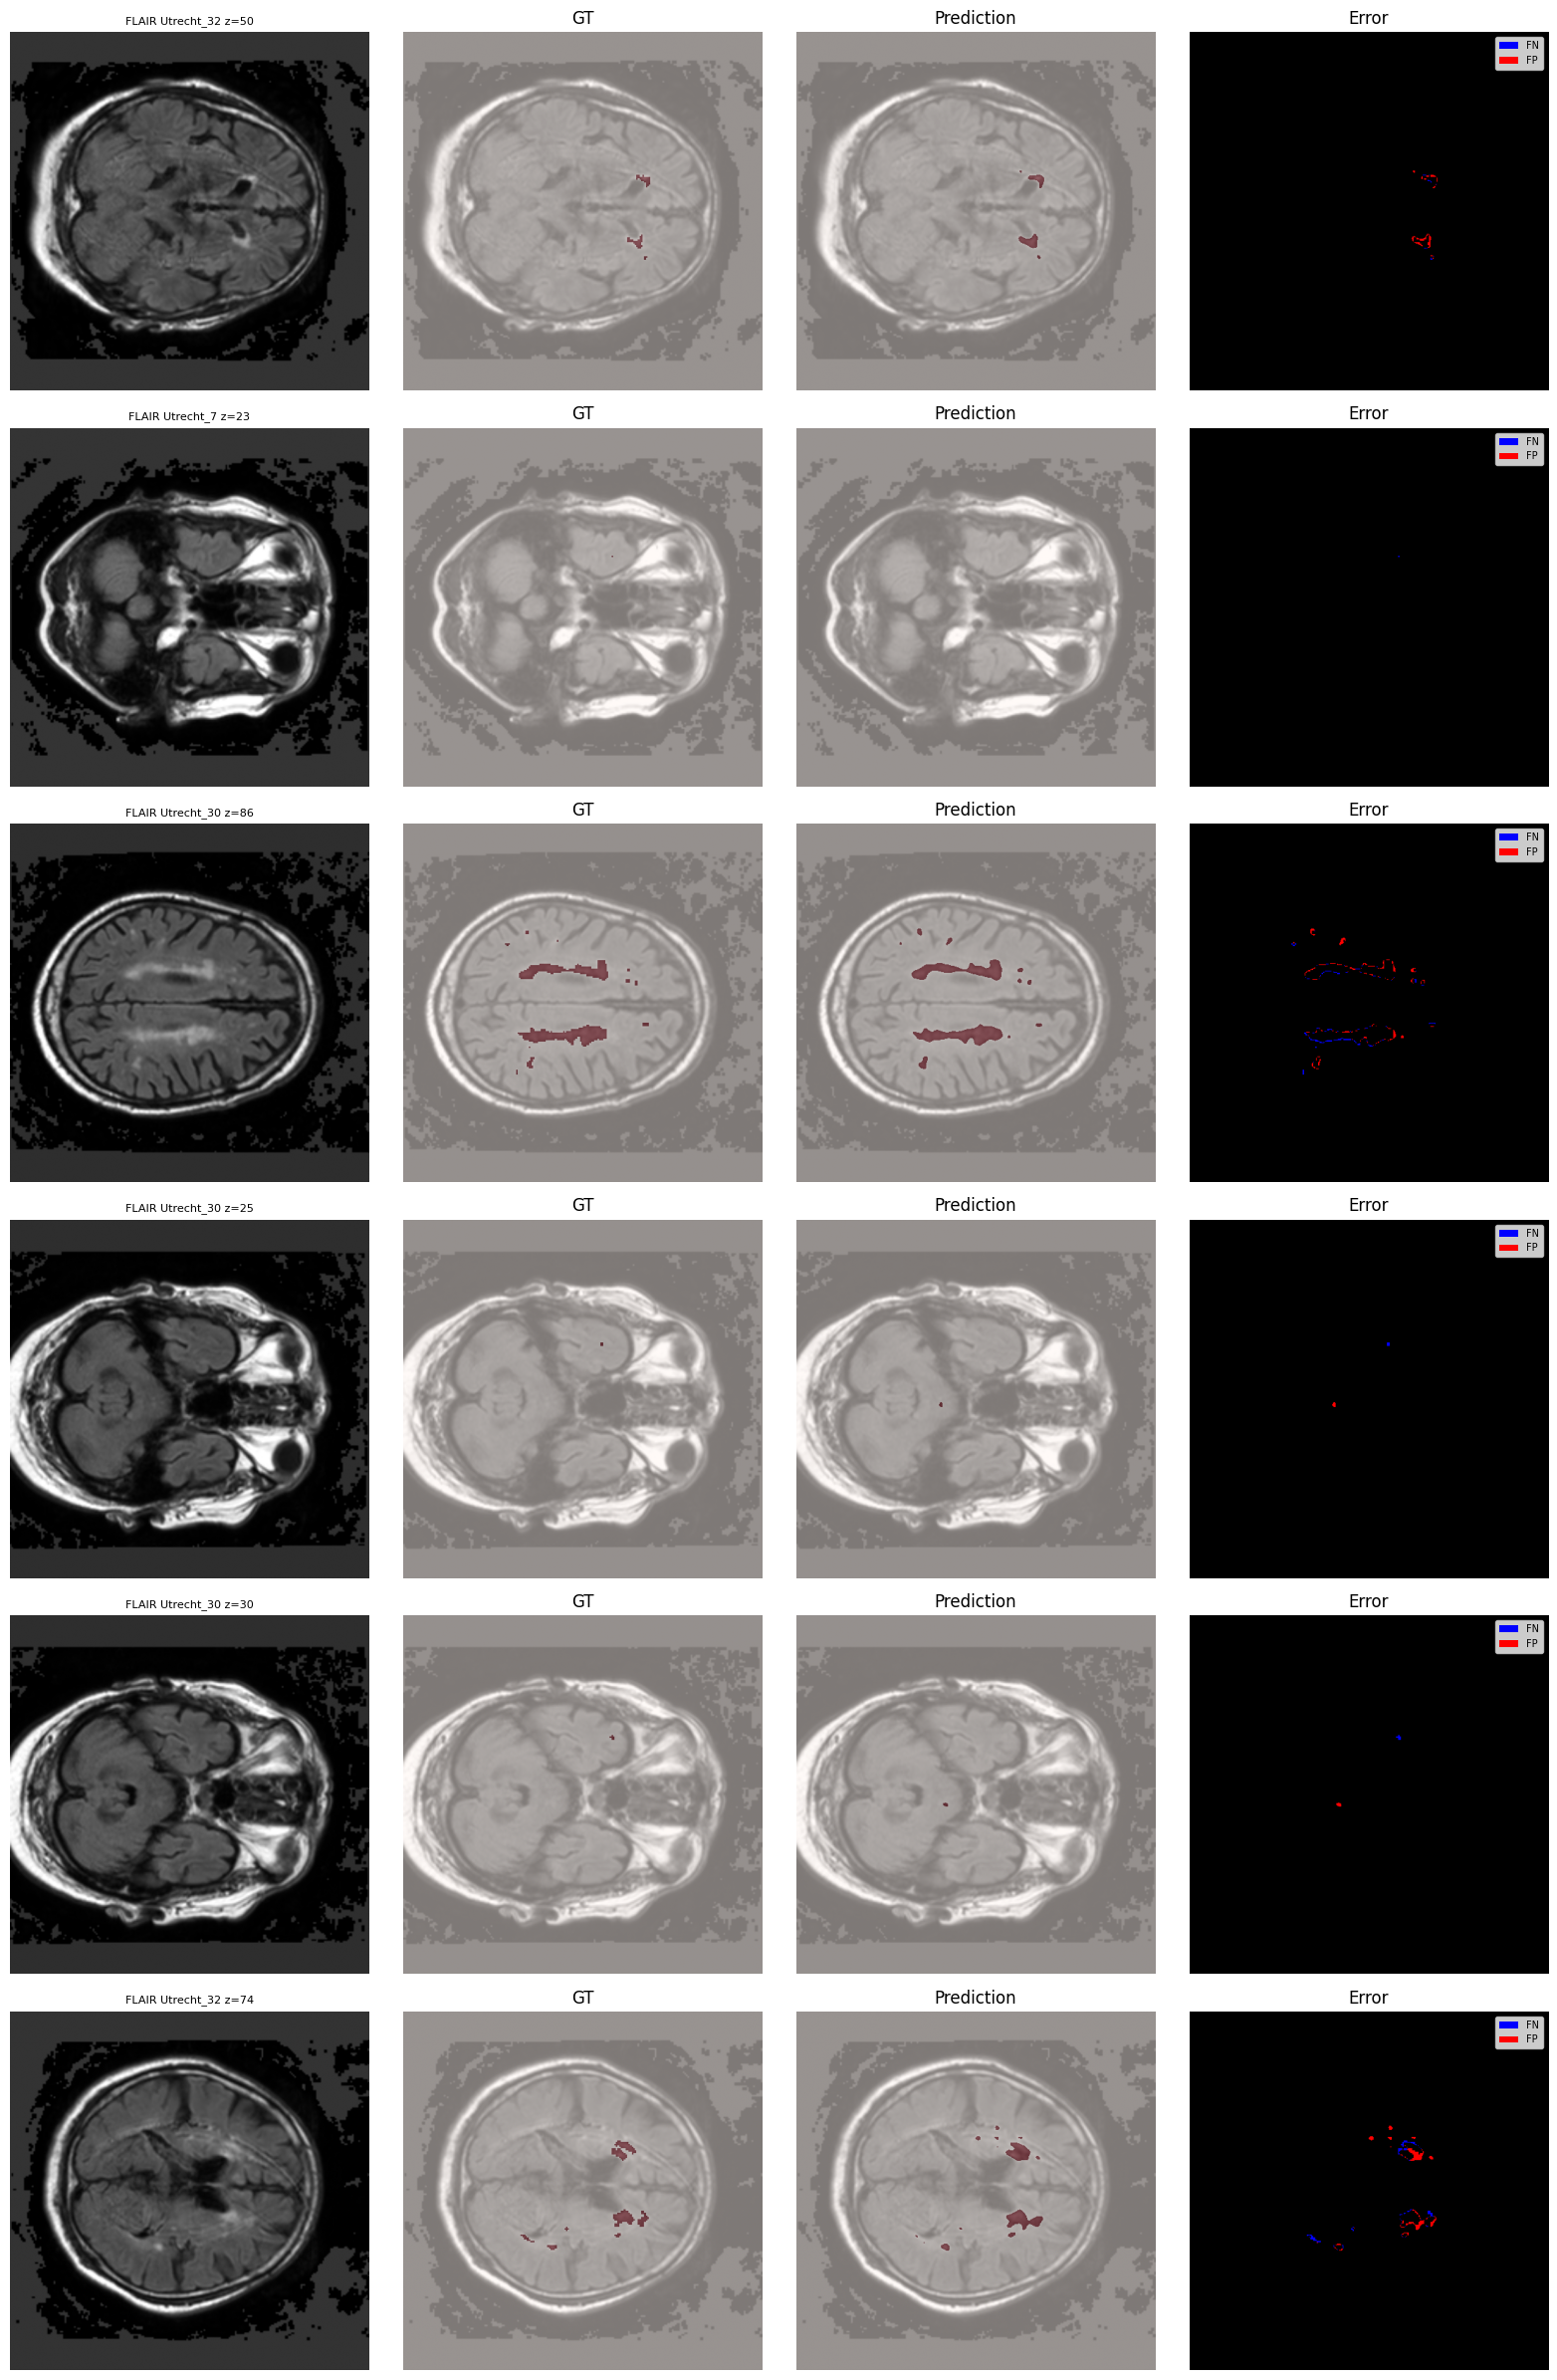


  ALL SAVED TO: /content/drive/MyDrive/WMH_ultimate
  best_ultimate.pth                                 28.3 MB
  bland_altman.png                                   0.1 MB
  checkpoint_ep010.pth                              84.8 MB
  checkpoint_ep020.pth                              84.8 MB
  checkpoint_ep030.pth                              84.8 MB
  checkpoint_ep040.pth                              84.8 MB
  checkpoint_ep050.pth                              84.8 MB
  checkpoint_ep060.pth                              84.8 MB
  checkpoint_ep070.pth                              84.8 MB
  checkpoint_ep080.pth                              84.8 MB
  checkpoint_ep090.pth                              84.8 MB
  checkpoint_ep100.pth                              84.8 MB
  final_results.json                                 0.0 MB
  full_state.json                                    0.0 MB
  history.json                                       0.0 MB
  medsam_vit_b.pth                             

In [1]:
# ============================================================
# WMH Segmentation — Ultimate Version
# Med-SAM ViT-B + High-Rank LoRA + Advanced Training
# Target: 0.80-0.85+ Dice | Colab Pro A100/V100
# ============================================================

# %% [markdown]
# # 1. Environment

# %%
!pip install nibabel monai segment-anything timm gdown kagglehub scipy -q

# %%
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
os.environ['KAGGLE_USERNAME'] = 'YOUR_USERNAME'
os.environ['KAGGLE_KEY']      = 'YOUR_API_KEY'

import gc, math, json, time, shutil, zipfile
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.checkpoint import checkpoint as grad_checkpoint
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from pathlib import Path
from collections import defaultdict
import warnings; warnings.filterwarnings('ignore')

import nibabel as nib
import monai
from monai.transforms import (
    Compose, LoadImaged, EnsureChannelFirstd,
    Orientationd, Spacingd,
)
from segment_anything import sam_model_registry
from scipy.ndimage import label as scipy_label
from scipy.ndimage import generate_binary_structure

print(f"PyTorch: {torch.__version__} | MONAI: {monai.__version__}")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    props = torch.cuda.get_device_properties(0)
    vram = getattr(props, 'total_memory',
                   getattr(props, 'total_mem', 0))
    gpu_name = props.name
    print(f"GPU: {gpu_name} | VRAM: {vram/1e9:.1f} GB")
else:
    gpu_name = "CPU"
    vram = 0
    print("⚠ NO GPU")
print(f"Device: {device}")

# ============================================================
# ADAPTIVE CONFIG based on GPU
# ============================================================
IS_A100 = 'A100' in gpu_name
IS_V100 = 'V100' in gpu_name
IS_HIGHEND = IS_A100 or IS_V100 or vram > 20e9

if IS_A100:
    IMG_SIZE = 512
    BATCH_SIZE = 4
    ACCUM_STEPS = 4      # effective batch = 16
    LORA_RANK = 64
    NUM_WORKERS = 4
    GRAD_CKPT = False     # A100 has plenty of VRAM
    print("→ A100 config: batch=4, accum=4, rank=64, no grad_ckpt")
elif IS_V100 or vram > 20e9:
    IMG_SIZE = 512
    BATCH_SIZE = 2
    ACCUM_STEPS = 8      # effective batch = 16
    LORA_RANK = 48
    NUM_WORKERS = 4
    GRAD_CKPT = False
    print("→ V100 config: batch=2, accum=8, rank=48")
else:
    IMG_SIZE = 512
    BATCH_SIZE = 1
    ACCUM_STEPS = 16     # effective batch = 16
    LORA_RANK = 32
    NUM_WORKERS = 2
    GRAD_CKPT = True
    print("→ Standard config: batch=1, accum=16, rank=32, grad_ckpt")

LORA_ALPHA = float(LORA_RANK)  # alpha = rank is standard
EPOCHS = 100
BASE_LR = 3e-4
WEIGHT_DECAY = 0.01
WARMUP_EPOCHS = 5
RESTART_PERIOD = 25   # cosine restart every 25 epochs
BG_RATIO_TRAIN = 0.08
BG_RATIO_VAL = 0.15
CHECKPOINT_EVERY = 10

print(f"Effective batch: {BATCH_SIZE * ACCUM_STEPS}")
print(f"LoRA: rank={LORA_RANK}, alpha={LORA_ALPHA}")
print(f"Epochs: {EPOCHS}, restarts every {RESTART_PERIOD}")

# %% [markdown]
# # 2. Drive Mount + Backup Dir

# %%
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

BACKUP_DIR = "/content/drive/MyDrive/WMH_ultimate"
os.makedirs(BACKUP_DIR, exist_ok=True)

# Check for existing checkpoints to resume from
RESUME_EPOCH = 0
RESUME_CKPT = None
for ep in range(EPOCHS, 0, -1):
    ckpt_path = f"{BACKUP_DIR}/checkpoint_ep{ep:03d}.pth"
    if os.path.exists(ckpt_path) and \
       os.path.getsize(ckpt_path) > 50000:
        RESUME_CKPT = ckpt_path
        RESUME_EPOCH = ep
        break

if RESUME_CKPT:
    print(f"✓ Found checkpoint at epoch {RESUME_EPOCH}: {RESUME_CKPT}")
    print(f"  Will resume training from epoch {RESUME_EPOCH + 1}")
else:
    # Check old backup dir
    OLD_BACKUP = "/content/drive/MyDrive/WMH_backup"
    if os.path.exists(f"{OLD_BACKUP}/best_flair_lora.pth"):
        print("Found previous best_flair_lora.pth "
              "(old rank=4, won't load into rank=64)")
    print("Starting fresh training")

# %% [markdown]
# # 3. Med-SAM Download

# %%
import gdown

MEDSAM_CHECKPOINT = "/content/medsam_vit_b.pth"

# Try drive first
for src in [f"{BACKUP_DIR}/medsam_vit_b.pth",
            "/content/drive/MyDrive/WMH_backup/medsam_vit_b.pth"]:
    if os.path.exists(src) and os.path.getsize(src) > 100_000_000:
        if not os.path.exists(MEDSAM_CHECKPOINT):
            shutil.copy2(src, MEDSAM_CHECKPOINT)
        print(f"✓ Med-SAM from Drive")
        break
else:
    if not (os.path.exists(MEDSAM_CHECKPOINT) and
            os.path.getsize(MEDSAM_CHECKPOINT) > 100_000_000):
        print("Downloading Med-SAM ViT-B...")
        gdown.download(id="1UAmWL88roYR7wKlnApw5Bcuzf2iQgk6_",
                       output=MEDSAM_CHECKPOINT, quiet=False)

sz = os.path.getsize(MEDSAM_CHECKPOINT)
assert sz > 100_000_000, f"Med-SAM corrupted ({sz} bytes)"
print(f"✓ Med-SAM: {sz/1e6:.0f} MB")

# Backup
if not os.path.exists(f"{BACKUP_DIR}/medsam_vit_b.pth"):
    shutil.copy2(MEDSAM_CHECKPOINT,
                 f"{BACKUP_DIR}/medsam_vit_b.pth")

# %% [markdown]
# # 4. Data Pipeline

# %%
import kagglehub

DATA_DIR = "/content/wmh_flair_only"
KAGGLE_DATASET_ID = "farahmo/wmh-dataset"
USE_SYNTHETIC = False


def filter_to_flair(src_dir, dst_dir):
    """Copy only FLAIR + WMH mask NIfTIs."""
    src = Path(src_dir)
    dst = Path(dst_dir)
    KEEP = {'flair', 'wmh'}
    copied = 0
    for root, dirs, files in os.walk(src):
        for fname in files:
            sf = Path(root) / fname
            fl = fname.lower()
            if not (fl.endswith('.nii.gz') or fl.endswith('.nii')):
                continue
            if any(k in fl for k in KEEP):
                rel = sf.relative_to(src)
                df = dst / rel
                df.parent.mkdir(parents=True, exist_ok=True)
                shutil.copy2(sf, df)
                copied += 1
    return copied


# Strategy 1: Restore from Drive zip
restored = False
for zip_src in [f"{BACKUP_DIR}/wmh_filtered_data.zip",
                "/content/drive/MyDrive/WMH_backup/"
                "wmh_filtered_data.zip"]:
    if os.path.exists(zip_src) and os.path.getsize(zip_src) > 1e6:
        if not os.path.isdir(DATA_DIR) or \
           len(list(Path(DATA_DIR).rglob("*.nii*"))) == 0:
            print(f"Extracting {zip_src}...")
            os.makedirs(DATA_DIR, exist_ok=True)
            with zipfile.ZipFile(zip_src, 'r') as z:
                z.extractall(DATA_DIR)
        n = len(list(Path(DATA_DIR).rglob("*.nii*")))
        if n > 0:
            print(f"✓ Restored {n} NIfTI files from Drive")
            restored = True
            break

# Strategy 2: Download from Kaggle
if not restored:
    uname = os.environ.get('KAGGLE_USERNAME', '')
    key = os.environ.get('KAGGLE_KEY', '')
    if uname and uname != 'YOUR_KAGGLE_USERNAME' and \
       key and key != 'YOUR_KAGGLE_API_KEY':
        print("Downloading from Kaggle...")
        try:
            raw = kagglehub.dataset_download(KAGGLE_DATASET_ID)
            print(f"Downloaded to: {raw}")
            os.makedirs(DATA_DIR, exist_ok=True)
            n = filter_to_flair(raw, DATA_DIR)
            print(f"Filtered: {n} files")
            shutil.rmtree(raw, ignore_errors=True)
            gc.collect()
            # Backup zip
            print("Backing up zip to Drive...")
            shutil.make_archive(
                f"{BACKUP_DIR}/wmh_filtered_data", 'zip', DATA_DIR)
            print("✓ Backed up")
            restored = True
        except Exception as e:
            print(f"Kaggle failed: {e}")
    else:
        print("⚠ No Kaggle credentials")

# Strategy 3: Synthetic
if not restored or not os.path.isdir(DATA_DIR) or \
   len(list(Path(DATA_DIR).rglob("*.nii*"))) == 0:
    USE_SYNTHETIC = True
    DATA_DIR = "/content/synthetic_wmh"
    print("Using synthetic data")


def create_synthetic(data_dir, n_per_site=7):
    data_dir = Path(data_dir)
    sites = {
        "Utrecht":   {"voxel":(0.96,0.96,3.0),
                      "shape":(132,256,83)},
        "Singapore": {"voxel":(1.0,1.0,3.0),
                      "shape":(252,232,48)},
        "GE3T":      {"voxel":(0.98,0.98,1.2),
                      "shape":(132,256,83)},
    }
    for site, info in sites.items():
        sh = info["shape"]
        aff = np.diag(list(info["voxel"])+[1.0])
        for idx in range(n_per_site):
            pre = data_dir/site/str(idx)/"pre"
            pre.mkdir(parents=True, exist_ok=True)
            sd = pre.parent
            rng = np.random.RandomState(
                hash(f"{site}_{idx}")%2**31)
            zz,yy,xx = np.mgrid[0:sh[0],0:sh[1],0:sh[2]]
            cz,cy,cx = [s//2 for s in sh]
            rz,ry,rx = [s*0.4 for s in sh]
            brain = (((zz-cz)/rz)**2+((yy-cy)/ry)**2+
                     ((xx-cx)/rx)**2) < 1
            flair = np.zeros(sh, np.float32)
            flair[brain] = 700 + rng.randn(brain.sum())*180
            flair = np.clip(flair, 0, None)
            mask = np.zeros(sh, np.float32)
            for _ in range(rng.randint(5, 25)):
                lx = rng.randint(max(1,int(cz-rz*.6)),
                                 min(sh[0]-1,int(cz+rz*.6)))
                ly = rng.randint(max(1,int(cy-ry*.6)),
                                 min(sh[1]-1,int(cy+ry*.6)))
                lz = rng.randint(max(1,int(cx-rx*.6)),
                                 min(sh[2]-1,int(cx+rx*.6)))
                sr = rng.randint(1, 6, size=3)
                xs = slice(max(lx-sr[0],0),min(lx+sr[0],sh[0]))
                ys = slice(max(ly-sr[1],0),min(ly+sr[1],sh[1]))
                zs = slice(max(lz-sr[2],0),min(lz+sr[2],sh[2]))
                v = brain[xs,ys,zs]
                mask[xs,ys,zs][v] = 1.0
                flair[xs,ys,zs][v] += 400 + rng.rand()*200
            nib.save(nib.Nifti1Image(flair, aff),
                     pre/"FLAIR.nii.gz")
            nib.save(nib.Nifti1Image(mask, aff),
                     sd/"wmh.nii.gz")
    print(f"Created {n_per_site*3} synthetic subjects")

if USE_SYNTHETIC:
    create_synthetic(DATA_DIR, n_per_site=7)

print(f"Data: {DATA_DIR}")

# %% [markdown]
# # 5. Subject Discovery + Split

# %%
class WMHCatalog:
    SITE_ALIASES = {
        "Utrecht": ["Utrecht","utrecht","UTRECHT"],
        "Singapore": ["Singapore","singapore","SINGAPORE"],
        "GE3T": ["GE3T","ge3t","Amsterdam","amsterdam",
                 "GE3T_Amsterdam","GE"],
    }

    def __init__(self, root):
        self.root = Path(root)
        self.subjects = []
        self._discover()

    def _discover(self):
        roots = [self.root]
        for c in self.root.iterdir():
            if c.is_dir():
                roots.append(c)
                for cc in c.iterdir():
                    if cc.is_dir(): roots.append(cc)

        found = {}
        for r in roots:
            if not r.is_dir(): continue
            for sn, als in self.SITE_ALIASES.items():
                for a in als:
                    d = r / a
                    if d.is_dir() and sn not in found:
                        found[sn] = d

        if not found:
            self._flat()
            return

        for site, sdir in sorted(found.items()):
            for sd in sorted(sdir.iterdir()):
                if not sd.is_dir(): continue
                e = self._find(sd, site)
                if e: self.subjects.append(e)

        print(f"Found {len(self.subjects)} subjects")
        ct = defaultdict(int)
        for s in self.subjects: ct[s['site']] += 1
        for s, n in sorted(ct.items()): print(f"  {s}: {n}")

    def _flat(self):
        fmap, mmap = {}, {}
        for f in self.root.rglob("*.nii*"):
            nl = f.name.lower()
            k = str(f.parent)
            if 'flair' in nl: fmap[k] = f
            elif 'wmh' in nl: mmap[k] = f
        for k in fmap:
            mk = mmap.get(k) or mmap.get(str(Path(k).parent))
            if not mk: continue
            site = "Unknown"
            kl = k.lower()
            if 'utrecht' in kl: site = "Utrecht"
            elif 'singapore' in kl: site = "Singapore"
            elif 'ge3t' in kl or 'amsterdam' in kl: site = "GE3T"
            self.subjects.append({
                "flair": str(fmap[k]), "mask": str(mk),
                "site": site,
                "subject_id": f"{site}_{Path(k).name}"})
        print(f"Found {len(self.subjects)} subjects (flat)")

    def _find(self, sd, site):
        flair = mask = None
        for d in [sd/"pre", sd]:
            if not d.is_dir(): continue
            for f in d.iterdir():
                if not f.is_file(): continue
                nl = f.name.lower()
                if not nl.endswith(('.nii.gz','.nii')): continue
                if 'flair' in nl and not flair: flair = f
        for f in sd.iterdir():
            if f.is_file():
                nl = f.name.lower()
                if nl.endswith(('.nii.gz','.nii')):
                    if any(x in nl for x in ['wmh','label','seg']):
                        mask = f; break
        if not mask:
            for f in sd.parent.iterdir():
                if f.is_file() and 'wmh' in f.name.lower():
                    mask = f; break
        if not flair or not mask: return None
        return {"flair": str(flair), "mask": str(mask),
                "site": site,
                "subject_id": f"{site}_{sd.name}"}


catalog = WMHCatalog(DATA_DIR)


def stratified_split(subjects, train_r=0.7, val_r=0.15, seed=42):
    rng = np.random.RandomState(seed)
    by_site = defaultdict(list)
    for s in subjects: by_site[s['site']].append(s)
    tr, va, te = [], [], []
    for site, sl in sorted(by_site.items()):
        n = len(sl); idx = rng.permutation(n)
        nt = max(1, round(n*train_r))
        nv = max(1, round(n*val_r))
        nte = max(1, n-nt-nv)
        while nt+nv+nte > n: nt -= 1
        while nt+nv+nte < n: nt += 1
        for i in idx[:nt]: tr.append(sl[i])
        for i in idx[nt:nt+nv]: va.append(sl[i])
        for i in idx[nt+nv:]: te.append(sl[i])
        print(f"  {site:12s}: {nt} tr, {nv} val, {nte} test")
    print(f"Total: {len(tr)} / {len(va)} / {len(te)}")
    return tr, va, te


# Try loading saved splits
splits_loaded = False
for sp in [f"{BACKUP_DIR}/full_state.json",
           "/content/drive/MyDrive/WMH_backup/full_state.json"]:
    if os.path.exists(sp):
        try:
            with open(sp) as f:
                st = json.load(f)
            if "train_subj" in st:
                # Verify paths exist
                test_f = st["train_subj"][0].get("flair", "")
                if os.path.exists(test_f):
                    train_subj = st["train_subj"]
                    val_subj = st["val_subj"]
                    test_subj = st["test_subj"]
                    splits_loaded = True
                    print(f"✓ Loaded splits: "
                          f"{len(train_subj)}/{len(val_subj)}/"
                          f"{len(test_subj)}")
                    break
        except Exception:
            pass

if not splits_loaded:
    print("Generating split (seed=42):")
    train_subj, val_subj, test_subj = stratified_split(
        catalog.subjects)

# Save splits
state_save = {
    "train_subj": train_subj,
    "val_subj": val_subj,
    "test_subj": test_subj,
    "config": {
        "img_size": IMG_SIZE, "lora_rank": LORA_RANK,
        "lora_alpha": LORA_ALPHA, "epochs": EPOCHS,
        "lr": BASE_LR, "batch": BATCH_SIZE,
        "accum": ACCUM_STEPS, "seed": 42,
    },
}
with open(f"{BACKUP_DIR}/full_state.json", "w") as f:
    json.dump(state_save, f, indent=2, default=str)

# %% [markdown]
# # 6. Advanced Dataset with Online Augmentation

# %%
class WMHDatasetV2(Dataset):
    """
    Improvements over V1:
    - Elastic deformation via random affine
    - Intensity augmentation (gamma, noise)
    - Oversampling of lesion-containing slices
    - Per-slice lesion fraction weighting
    """

    def __init__(self, subject_list, slice_size=IMG_SIZE,
                 mode='train', bg_ratio=0.05):
        self.sz = slice_size
        self.mode = mode
        self.bg_ratio = bg_ratio
        self.spatial_transform = Compose([
            LoadImaged(keys=["flair", "mask"]),
            EnsureChannelFirstd(keys=["flair", "mask"]),
            Orientationd(keys=["flair", "mask"], axcodes="RAS"),
            Spacingd(keys=["flair", "mask"],
                     pixdim=(1.0, 1.0, 1.0),
                     mode=("bilinear", "nearest")),
        ])
        self.slices = []
        self.meta = {'sites': defaultdict(int),
                     'n_les': 0, 'n_bg': 0}
        self._prepare(subject_list)

    @staticmethod
    def _robust_zscore(vol, brain):
        if brain.sum() == 0: return vol
        v = vol[brain]
        lo, hi = np.percentile(v, [0.5, 99.5])
        vol = np.clip(vol, lo, hi)
        v = vol[brain]
        m, s = v.mean(), max(v.std(), 1e-8)
        vol = (vol - m) / s
        vol[~brain] = 0.0
        return vol

    def _prepare(self, subjects):
        for i, subj in enumerate(subjects):
            try:
                data = self.spatial_transform({
                    "flair": subj["flair"],
                    "mask": subj["mask"]})
                flair = np.array(data["flair"][0], np.float32)
                mask_raw = np.array(data["mask"][0], np.float32)
                wmh = (mask_raw == 1).astype(np.float32)
                brain = flair > 0
                flair = self._robust_zscore(flair, brain)
                self.meta['sites'][subj['site']] += 1
                rng = np.random.RandomState(
                    hash(subj['subject_id']) % 2**31)

                for z in range(flair.shape[-1]):
                    fs = flair[:,:,z]
                    ms = wmh[:,:,z]
                    if (np.abs(fs) > 0.01).sum() / fs.size < 0.05:
                        continue
                    has_les = ms.sum() > 0
                    if has_les:
                        self.meta['n_les'] += 1
                    elif rng.rand() < self.bg_ratio:
                        self.meta['n_bg'] += 1
                    else:
                        continue

                    # Compute lesion fraction for weighting
                    les_frac = ms.sum() / max(
                        (np.abs(fs) > 0.01).sum(), 1)

                    self.slices.append({
                        "flair": fs.copy(),
                        "mask": ms.copy(),
                        "subject_id": subj['subject_id'],
                        "site": subj['site'],
                        "slice_idx": z,
                        "has_lesion": has_les,
                        "les_frac": float(les_frac),
                    })

                if (i+1) % 5 == 0 or i == 0:
                    print(f"    [{i+1}/{len(subjects)}] "
                          f"{subj['subject_id']} — "
                          f"{len(self.slices)} slices")
            except Exception as e:
                print(f"    [{i+1}/{len(subjects)}] "
                      f"{subj['subject_id']} ERROR: {e}")

        nl, nb = self.meta['n_les'], self.meta['n_bg']
        print(f"  [{self.mode.upper()}] {nl+nb} slices "
              f"(les:{nl}, bg:{nb})")

    def __len__(self):
        return len(self.slices)

    def _augment_intensity(self, image):
        """Online intensity augmentation for training."""
        # Random gamma correction
        if torch.rand(1).item() > 0.5:
            gamma = torch.empty(1).uniform_(0.7, 1.5).item()
            mn = image.min()
            rng = image.max() - mn
            if rng > 1e-6:
                image = ((image - mn) / rng).clamp(0, 1)
                image = image.pow(gamma) * rng + mn

        # Random Gaussian noise
        if torch.rand(1).item() > 0.5:
            std = torch.empty(1).uniform_(0.01, 0.08).item()
            image = image + torch.randn_like(image) * std

        # Random brightness
        if torch.rand(1).item() > 0.5:
            image = image + torch.empty(1).uniform_(-0.15, 0.15)

        # Random contrast
        if torch.rand(1).item() > 0.5:
            factor = torch.empty(1).uniform_(0.8, 1.3).item()
            mean = image.mean()
            image = (image - mean) * factor + mean

        return image

    def _augment_spatial(self, image, mask):
        """Spatial augmentations for training."""
        # Horizontal flip
        if torch.rand(1).item() > 0.5:
            image = torch.flip(image, [-1])
            mask = torch.flip(mask, [-1])

        # Vertical flip
        if torch.rand(1).item() > 0.5:
            image = torch.flip(image, [-2])
            mask = torch.flip(mask, [-2])

        # 90-degree rotation
        if torch.rand(1).item() > 0.5:
            k = torch.randint(1, 4, (1,)).item()
            image = torch.rot90(image, k, [-2, -1])
            mask = torch.rot90(mask, k, [-2, -1])

        # Random affine (small rotation + scale + translate)
        if torch.rand(1).item() > 0.3:
            angle = torch.empty(1).uniform_(-15, 15).item()
            scale = torch.empty(1).uniform_(0.9, 1.1).item()
            tx = torch.empty(1).uniform_(-0.05, 0.05).item()
            ty = torch.empty(1).uniform_(-0.05, 0.05).item()

            rad = math.radians(angle)
            cos_a, sin_a = math.cos(rad)*scale, math.sin(rad)*scale
            theta = torch.tensor([
                [cos_a, -sin_a, tx],
                [sin_a,  cos_a, ty]
            ], dtype=torch.float32).unsqueeze(0)

            grid = F.affine_grid(theta, image.unsqueeze(0).size(),
                                 align_corners=False)
            image = F.grid_sample(
                image.unsqueeze(0), grid,
                mode='bilinear', align_corners=False,
                padding_mode='zeros').squeeze(0)
            mask = F.grid_sample(
                mask.unsqueeze(0), grid,
                mode='nearest', align_corners=False,
                padding_mode='zeros').squeeze(0)

        return image, mask

    def __getitem__(self, idx):
        e = self.slices[idx]
        image = torch.from_numpy(
            e["flair"]).float().unsqueeze(0)
        mask = torch.from_numpy(
            e["mask"]).float().unsqueeze(0)

        image = F.interpolate(
            image.unsqueeze(0), (self.sz, self.sz),
            mode='bilinear', align_corners=False).squeeze(0)
        mask = F.interpolate(
            mask.unsqueeze(0), (self.sz, self.sz),
            mode='nearest').squeeze(0)
        mask = (mask > 0.5).float()

        if self.mode == 'train':
            image, mask = self._augment_spatial(image, mask)
            image = self._augment_intensity(image)

        return {
            "image": image,
            "mask": mask,
            "subject_id": e["subject_id"],
            "site": e["site"],
            "slice_idx": e["slice_idx"],
            "has_lesion": e["has_lesion"],
            "les_frac": e["les_frac"],
        }


print("="*60)
print("Building datasets...")
print("="*60)

print("\nTrain:")
train_ds = WMHDatasetV2(train_subj, IMG_SIZE, 'train', BG_RATIO_TRAIN)
print("\nVal:")
val_ds = WMHDatasetV2(val_subj, IMG_SIZE, 'val', BG_RATIO_VAL)
print("\nTest:")
test_ds = WMHDatasetV2(test_subj, IMG_SIZE, 'test', BG_RATIO_VAL)

train_loader = DataLoader(
    train_ds, batch_size=BATCH_SIZE, shuffle=True,
    num_workers=NUM_WORKERS, pin_memory=True, drop_last=True,
    persistent_workers=True)
val_loader = DataLoader(
    val_ds, batch_size=BATCH_SIZE, shuffle=False,
    num_workers=NUM_WORKERS, pin_memory=True,
    persistent_workers=True)
test_loader = DataLoader(
    test_ds, batch_size=1, shuffle=False,
    num_workers=NUM_WORKERS, pin_memory=True)

s = train_ds[0]
assert s['image'].shape == (1, IMG_SIZE, IMG_SIZE)
print(f"\n✓ Dataset: image={s['image'].shape}, "
      f"mask={s['mask'].shape}")

# %% [markdown]
# # 7. Model Architecture

# %%
class LoRALinear(nn.Module):
    """LoRA with optional dropout for regularization."""
    def __init__(self, orig, rank=4, alpha=1.0, dropout=0.05):
        super().__init__()
        self.in_f = orig.in_features
        self.out_f = orig.out_features
        self.scaling = alpha / rank
        self.weight = orig.weight
        self.weight.requires_grad = False
        self.bias = orig.bias
        if self.bias is not None:
            self.bias.requires_grad = False
        self.lora_A = nn.Parameter(torch.empty(rank, self.in_f))
        self.lora_B = nn.Parameter(torch.empty(self.out_f, rank))
        nn.init.kaiming_uniform_(self.lora_A, a=math.sqrt(5))
        nn.init.zeros_(self.lora_B)
        self.dropout = nn.Dropout(dropout) if dropout > 0 else None

    def forward(self, x):
        base = F.linear(x, self.weight, self.bias)
        lora_in = self.dropout(x) if self.dropout else x
        return base + F.linear(
            F.linear(lora_in, self.lora_A),
            self.lora_B) * self.scaling


class MultiScaleDecoder(nn.Module):
    """
    Multi-scale decoder with skip-like refinement.
    Better than simple sequential upsampling for
    small lesion boundaries.
    """
    def __init__(self, in_ch=256):
        super().__init__()
        # Main upsampling path
        self.up1 = self._up_block(in_ch, 128)
        self.up2 = self._up_block(128, 64)
        self.up3 = self._up_block(64, 32)
        self.up4 = self._up_block(32, 16)

        # Refinement convolutions after each upsample
        self.ref1 = self._refine(128)
        self.ref2 = self._refine(64)
        self.ref3 = self._refine(32)

        # Multi-scale prediction heads
        self.head_32 = nn.Conv2d(128, 1, 1)   # 64×64
        self.head_64 = nn.Conv2d(64, 1, 1)    # 128×128
        self.head_128 = nn.Conv2d(32, 1, 1)   # 256×256
        self.head_final = nn.Conv2d(16, 1, 1)  # 512×512

        # Learned fusion of multi-scale predictions
        self.fuse = nn.Sequential(
            nn.Conv2d(4, 8, 3, padding=1),
            nn.BatchNorm2d(8), nn.GELU(),
            nn.Conv2d(8, 1, 1))

    @staticmethod
    def _up_block(ic, oc):
        return nn.Sequential(
            nn.ConvTranspose2d(ic, oc, 2, stride=2),
            nn.BatchNorm2d(oc), nn.GELU(),
            nn.Conv2d(oc, oc, 3, padding=1),
            nn.BatchNorm2d(oc), nn.GELU())

    @staticmethod
    def _refine(ch):
        return nn.Sequential(
            nn.Conv2d(ch, ch, 3, padding=1),
            nn.BatchNorm2d(ch), nn.GELU())

    def forward(self, feat):
        """feat: [B, 256, 32, 32] → [B, 1, 512, 512]"""
        target_size = (512, 512)

        x1 = self.up1(feat)      # [B, 128, 64, 64]
        x1 = self.ref1(x1)
        p1 = self.head_32(x1)     # [B, 1, 64, 64]

        x2 = self.up2(x1)         # [B, 64, 128, 128]
        x2 = self.ref2(x2)
        p2 = self.head_64(x2)     # [B, 1, 128, 128]

        x3 = self.up3(x2)         # [B, 32, 256, 256]
        x3 = self.ref3(x3)
        p3 = self.head_128(x3)    # [B, 1, 256, 256]

        x4 = self.up4(x3)         # [B, 16, 512, 512]
        p4 = self.head_final(x4)  # [B, 1, 512, 512]

        # Upsample all to target
        p1_up = F.interpolate(p1, target_size, mode='bilinear',
                              align_corners=False)
        p2_up = F.interpolate(p2, target_size, mode='bilinear',
                              align_corners=False)
        p3_up = F.interpolate(p3, target_size, mode='bilinear',
                              align_corners=False)

        fused = self.fuse(
            torch.cat([p1_up, p2_up, p3_up, p4], dim=1))

        return fused, [p1, p2, p3, p4]


class MedSAMLoRAUltimate(nn.Module):
    """
    Med-SAM ViT-B + High-rank LoRA + Multi-scale decoder.

    Changes from V1:
    - LoRA rank 32-64 (was 4)
    - LoRA dropout for regularization
    - LoRA on MLP layers in addition to attention
    - Multi-scale decoder with deep supervision
    - Channel adapter with learned mixing
    """

    def __init__(self, ckpt, lora_rank=64, lora_alpha=64.0,
                 lora_dropout=0.05, inject_proj=True,
                 inject_mlp=True, grad_ckpt=False):
        super().__init__()
        self.use_gc = grad_ckpt

        print("  Loading Med-SAM ViT-B...")
        sam = sam_model_registry["vit_b"](checkpoint=ckpt)
        self.image_encoder = sam.image_encoder
        del sam.prompt_encoder, sam.mask_decoder, sam
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        # Learned channel adapter (1→3)
        self.channel_adapter = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1),
            nn.BatchNorm2d(16), nn.GELU(),
            nn.Conv2d(16, 3, 1))

        # Initialize adapter near identity
        with torch.no_grad():
            nn.init.kaiming_normal_(
                self.channel_adapter[0].weight)
            self.channel_adapter[0].bias.zero_()
            self.channel_adapter[3].weight.zero_()
            for c in range(3):
                # Each output channel averages from 16 intermediate
                self.channel_adapter[3].weight[c, :, 0, 0] = 1/16
            self.channel_adapter[3].bias.zero_()

        # Freeze encoder
        for p in self.image_encoder.parameters():
            p.requires_grad = False

        # Inject LoRA into attention AND MLP
        self.lora_layers = nn.ModuleList()
        n_attn = n_mlp = 0
        for blk in self.image_encoder.blocks:
            # QKV
            if isinstance(blk.attn.qkv, nn.Linear):
                l = LoRALinear(blk.attn.qkv, lora_rank,
                               lora_alpha, lora_dropout)
                blk.attn.qkv = l
                self.lora_layers.append(l)
                n_attn += 1

            # Attention projection
            if inject_proj and isinstance(
                    blk.attn.proj, nn.Linear):
                l = LoRALinear(blk.attn.proj, lora_rank,
                               lora_alpha, lora_dropout)
                blk.attn.proj = l
                self.lora_layers.append(l)
                n_attn += 1

            # MLP layers (fc1, fc2)
            if inject_mlp:
                if hasattr(blk.mlp, 'lin1') and \
                   isinstance(blk.mlp.lin1, nn.Linear):
                    l = LoRALinear(blk.mlp.lin1, lora_rank // 2,
                                   lora_alpha / 2, lora_dropout)
                    blk.mlp.lin1 = l
                    self.lora_layers.append(l)
                    n_mlp += 1
                if hasattr(blk.mlp, 'lin2') and \
                   isinstance(blk.mlp.lin2, nn.Linear):
                    l = LoRALinear(blk.mlp.lin2, lora_rank // 2,
                                   lora_alpha / 2, lora_dropout)
                    blk.mlp.lin2 = l
                    self.lora_layers.append(l)
                    n_mlp += 1

        print(f"  LoRA: {n_attn} attn + {n_mlp} MLP layers "
              f"(rank={lora_rank})")

        # Multi-scale decoder
        self.decoder = MultiScaleDecoder(256)

        tot = sum(p.numel() for p in self.parameters())
        trn = sum(p.numel() for p in self.parameters()
                  if p.requires_grad)
        lora_p = sum(p.numel()
                     for p in self.lora_layers.parameters())
        adapt_p = sum(p.numel()
                      for p in self.channel_adapter.parameters())
        dec_p = sum(p.numel()
                    for p in self.decoder.parameters())

        print(f"\n  {'='*50}")
        print(f"  Adapter:   {adapt_p:>12,}")
        print(f"  LoRA:      {lora_p:>12,}")
        print(f"  Decoder:   {dec_p:>12,}")
        print(f"  Frozen:    {tot-trn:>12,}")
        print(f"  {'─'*36}")
        print(f"  Total:     {tot:>12,}")
        print(f"  Trainable: {trn:>12,} ({100*trn/tot:.2f}%)")
        print(f"  {'='*50}\n")

    def _interp_pos(self, x):
        pos = self.image_encoder.pos_embed
        _, H0, W0, C = pos.shape
        _, H1, W1, _ = x.shape
        if H1 == H0 and W1 == W0: return pos
        p = pos.permute(0,3,1,2).float()
        p = F.interpolate(p, (H1,W1), mode='bicubic',
                          align_corners=False)
        return p.permute(0,2,3,1)

    def forward(self, x, return_multiscale=False):
        """
        x: [B, 1, 512, 512]
        Returns: logits [B, 1, 512, 512]
        If return_multiscale: also returns list of
        intermediate predictions for deep supervision
        """
        x = self.channel_adapter(x)
        enc = self.image_encoder
        tokens = enc.patch_embed(x)
        tokens = tokens + self._interp_pos(tokens)
        for blk in enc.blocks:
            if self.use_gc and self.training:
                tokens = grad_checkpoint(
                    blk, tokens, use_reentrant=False)
            else:
                tokens = blk(tokens)
        feat = enc.neck(tokens.permute(0,3,1,2))
        logits, multi = self.decoder(feat)

        if return_multiscale:
            return logits, multi
        return logits

    def get_trainable_params(self):
        return [p for p in self.parameters() if p.requires_grad]

    def save_checkpoint(self, path, epoch, optimizer, scheduler,
                        scaler, best_dice, history):
        """Full checkpoint for resume."""
        trainable = {k: v.cpu() for k, v in self.named_parameters()
                     if v.requires_grad}
        torch.save({
            'epoch': epoch,
            'model_trainable': trainable,
            'optimizer': optimizer.state_dict(),
            'scheduler': scheduler.state_dict(),
            'scaler': scaler.state_dict(),
            'best_dice': best_dice,
            'history': history,
        }, path)
        print(f"  Checkpoint: {path} "
              f"({os.path.getsize(path)/1e6:.1f} MB)")

    def load_checkpoint(self, path, optimizer=None,
                        scheduler=None, scaler=None):
        """Load checkpoint and optionally restore optimizer."""
        ckpt = torch.load(path, map_location='cpu',
                          weights_only=False)
        own = self.state_dict()
        n = 0
        for k, v in ckpt['model_trainable'].items():
            if k in own:
                own[k].copy_(v)
                n += 1
        print(f"  Loaded {n} tensors from epoch "
              f"{ckpt['epoch']}")
        if optimizer and 'optimizer' in ckpt:
            optimizer.load_state_dict(ckpt['optimizer'])
        if scheduler and 'scheduler' in ckpt:
            scheduler.load_state_dict(ckpt['scheduler'])
        if scaler and 'scaler' in ckpt:
            scaler.load_state_dict(ckpt['scaler'])
        return (ckpt['epoch'],
                ckpt.get('best_dice', 0),
                ckpt.get('history', {
                    'tl':[],'vl':[],'vd':[],'lr':[]}))

    def save_weights_only(self, path):
        """Lightweight save of just trainable params."""
        st = {k: v.cpu() for k, v in self.named_parameters()
              if v.requires_grad}
        torch.save(st, path)

    def load_weights_only(self, path):
        st = torch.load(path, map_location='cpu',
                        weights_only=True)
        own = self.state_dict()
        n = 0
        for k, v in st.items():
            if k in own: own[k].copy_(v); n += 1
        print(f"  Loaded {n} weight tensors")


# Build model
print("="*60)
print("Building model...")
print("="*60)

if torch.cuda.is_available():
    torch.cuda.empty_cache()
gc.collect()

model = MedSAMLoRAUltimate(
    ckpt=MEDSAM_CHECKPOINT,
    lora_rank=LORA_RANK,
    lora_alpha=LORA_ALPHA,
    lora_dropout=0.05,
    inject_proj=True,
    inject_mlp=True,
    grad_ckpt=GRAD_CKPT,
).to(device)

# Forward test
print("Forward pass test...")
model.eval()
with torch.no_grad():
    d_in = torch.randn(1, 1, IMG_SIZE, IMG_SIZE, device=device)
    if device.type == 'cuda':
        with torch.amp.autocast('cuda'):
            d_out, d_multi = model(d_in, return_multiscale=True)
    else:
        d_out, d_multi = model(d_in, return_multiscale=True)
    assert d_out.shape == (1, 1, IMG_SIZE, IMG_SIZE)
    print(f"  Main:   {d_out.shape}")
    for i, p in enumerate(d_multi):
        print(f"  Scale {i}: {p.shape}")
    del d_in, d_out, d_multi
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
print("✓ Model verified\n")

# %% [markdown]
# # 8. Advanced Loss Function

# %%
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.75, gamma=2.0):
        super().__init__()
        self.a, self.g = alpha, gamma

    def forward(self, lo, ta):
        bce = F.binary_cross_entropy_with_logits(
            lo, ta, reduction='none')
        p = torch.sigmoid(lo)
        pt = p * ta + (1-p) * (1-ta)
        at = self.a * ta + (1-self.a) * (1-ta)
        return (at * (1-pt)**self.g * bce).mean()


class SoftDiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super().__init__()
        self.s = smooth

    def forward(self, lo, ta):
        p = torch.sigmoid(lo).view(lo.size(0), -1)
        t = ta.view(ta.size(0), -1)
        i = (p * t).sum(1)
        return 1 - ((2*i+self.s) /
                     (p.sum(1)+t.sum(1)+self.s)).mean()


class BoundaryLoss(nn.Module):
    """
    Loss that penalizes boundary errors more heavily.
    Computed via distance-weighted BCE on the boundary region.
    """
    def __init__(self, weight=1.0, kernel_size=5):
        super().__init__()
        self.weight = weight
        self.ks = kernel_size

    def forward(self, lo, ta):
        # Find boundary pixels via dilation - erosion
        pad = self.ks // 2
        kernel = torch.ones(1, 1, self.ks, self.ks,
                            device=ta.device)
        dilated = F.conv2d(ta, kernel, padding=pad).clamp(0, 1)
        eroded = 1 - F.conv2d(1 - ta, kernel,
                               padding=pad).clamp(0, 1)
        boundary = (dilated - eroded).clamp(0, 1)

        # Boundary-weighted BCE
        bce = F.binary_cross_entropy_with_logits(
            lo, ta, reduction='none')
        # Weight boundary pixels 3× more
        weight_map = 1.0 + 2.0 * boundary
        return (weight_map * bce).mean() * self.weight


class DeepSupervisionLoss(nn.Module):
    """
    Combined loss with deep supervision from multi-scale decoder.

    Main output:    Focal + Dice + Boundary
    Aux outputs:    Focal + Dice (downsampled GT)

    Weights: main=1.0, aux=[0.4, 0.3, 0.2, 0.1]
    """
    def __init__(self):
        super().__init__()
        self.focal = FocalLoss(alpha=0.75, gamma=2.0)
        self.dice = SoftDiceLoss(smooth=1.0)
        self.boundary = BoundaryLoss(weight=0.5)

        # Aux weights: 64×64, 128×128, 256×256, 512×512
        self.aux_weights = [0.4, 0.3, 0.2, 0.1]

    def forward(self, main_logits, multi_logits, target):
        """
        main_logits: [B, 1, 512, 512]
        multi_logits: list of [B, 1, H, W] at different scales
        target: [B, 1, 512, 512]
        """
        # Main loss
        loss = (self.focal(main_logits, target) +
                self.dice(main_logits, target) +
                self.boundary(main_logits, target))

        # Deep supervision
        for i, (aux, w) in enumerate(
                zip(multi_logits, self.aux_weights)):
            h, w_px = aux.shape[-2:]
            t_down = F.interpolate(target, (h, w_px),
                                   mode='nearest')
            aux_loss = (self.focal(aux, t_down) +
                        self.dice(aux, t_down))
            loss = loss + w * aux_loss

        return loss

# %% [markdown]
# # 9. Trainer with Cosine Warm Restarts + Auto Checkpoint

# %%
class UltimateTrainer:
    def __init__(self, model, device, lr=3e-4, wd=0.01,
                 accum=4, warmup=5, restart_period=25,
                 ckpt_every=10, backup_dir=BACKUP_DIR):
        self.model = model
        self.dev = device
        self.accum = accum
        self.warmup = warmup
        self.backup_dir = backup_dir
        self.ckpt_every = ckpt_every

        self.criterion = DeepSupervisionLoss()

        self.opt = torch.optim.AdamW(
            model.get_trainable_params(),
            lr=lr, weight_decay=wd, betas=(0.9, 0.999))

        # CosineAnnealingWarmRestarts
        self.scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
            self.opt, T_0=restart_period, T_mult=1, eta_min=1e-6)

        self.scaler = torch.amp.GradScaler('cuda')
        self.dm = monai.metrics.DiceMetric(
            include_background=False, reduction="mean")

        self.hist = {'tl': [], 'vl': [], 'vd': [], 'lr': []}
        self.best = 0.0
        self.start_epoch = 0

    def resume(self, ckpt_path):
        """Resume from checkpoint."""
        ep, best, hist = self.model.load_checkpoint(
            ckpt_path, self.opt, self.scheduler, self.scaler)
        self.start_epoch = ep
        self.best = best
        self.hist = hist
        # Advance scheduler to correct position
        for _ in range(ep):
            self.scheduler.step()
        print(f"  Resuming from epoch {ep}, best={best:.4f}")

    def _warmup_lr(self, ep):
        """Manual warmup before handing off to scheduler."""
        if ep < self.warmup:
            factor = (ep + 1) / self.warmup
            for pg in self.opt.param_groups:
                pg['lr'] = pg['initial_lr'] * factor \
                    if 'initial_lr' in pg else 3e-4 * factor

    def train_epoch(self, loader, epoch):
        self.model.train()
        total_loss = 0
        n_steps = 0

        if epoch < self.warmup:
            self._warmup_lr(epoch)

        self.opt.zero_grad(set_to_none=True)

        for step, batch in enumerate(loader):
            im = batch['image'].to(self.dev, non_blocking=True)
            mk = batch['mask'].to(self.dev, non_blocking=True)

            with torch.amp.autocast('cuda'):
                main_out, multi_out = self.model(
                    im, return_multiscale=True)
                loss = self.criterion(
                    main_out, multi_out, mk) / self.accum

            self.scaler.scale(loss).backward()

            if (step + 1) % self.accum == 0:
                self.scaler.unscale_(self.opt)
                nn.utils.clip_grad_norm_(
                    self.model.get_trainable_params(), 1.0)
                self.scaler.step(self.opt)
                self.scaler.update()
                self.opt.zero_grad(set_to_none=True)

            total_loss += loss.item() * self.accum
            n_steps += 1
            del im, mk, main_out, multi_out, loss

        # Flush remaining gradients
        if n_steps % self.accum != 0:
            self.scaler.unscale_(self.opt)
            nn.utils.clip_grad_norm_(
                self.model.get_trainable_params(), 1.0)
            self.scaler.step(self.opt)
            self.scaler.update()
            self.opt.zero_grad(set_to_none=True)

        # Step scheduler (after warmup)
        if epoch >= self.warmup:
            self.scheduler.step()

        lr = self.opt.param_groups[0]['lr']
        return total_loss / max(n_steps, 1), lr

    @torch.no_grad()
    def val_epoch(self, loader):
        self.model.eval()
        total_loss = 0
        n_steps = 0
        self.dm.reset()
        stp = defaultdict(float)
        sfp = defaultdict(float)
        sfn = defaultdict(float)

        for batch in loader:
            im = batch['image'].to(self.dev, non_blocking=True)
            mk = batch['mask'].to(self.dev, non_blocking=True)

            with torch.amp.autocast('cuda'):
                main_out, multi_out = self.model(
                    im, return_multiscale=True)
                loss = self.criterion(main_out, multi_out, mk)

            total_loss += loss.item()
            n_steps += 1

            pred = (torch.sigmoid(main_out) > 0.5).float()
            self.dm(pred, mk.long())

            pn = pred.cpu().numpy()
            mn = mk.cpu().numpy()
            for i, s in enumerate(batch['site']):
                p = pn[i].flatten()
                m = mn[i].flatten()
                stp[s] += (p * m).sum()
                sfp[s] += (p * (1-m)).sum()
                sfn[s] += ((1-p) * m).sum()

            del im, mk, main_out, multi_out, loss, pred

        dice = self.dm.aggregate().item()
        self.dm.reset()
        sd = {s: (2*stp[s]+1)/(2*stp[s]+sfp[s]+sfn[s]+1)
              for s in stp}
        return total_loss / max(n_steps, 1), dice, sd

    def train(self, train_ld, val_ld, epochs=100):
        eff = train_ld.batch_size * self.accum
        print(f"\n{'='*70}")
        print(f"  Ultimate Training")
        print(f"  {epochs} epochs | eff_batch={eff} | "
              f"LoRA rank={LORA_RANK}")
        print(f"  Train:{len(train_ld.dataset)} "
              f"Val:{len(val_ld.dataset)}")
        print(f"  Checkpoint every {self.ckpt_every} epochs "
              f"→ {self.backup_dir}")
        print(f"{'='*70}\n")

        start_ep = self.start_epoch
        epoch_times = []

        for ep in range(start_ep, epochs):
            t0 = time.time()

            tl, lr = self.train_epoch(train_ld, ep)
            vl, vd, sd = self.val_epoch(val_ld)

            self.hist['tl'].append(tl)
            self.hist['vl'].append(vl)
            self.hist['vd'].append(vd)
            self.hist['lr'].append(lr)

            elapsed = time.time() - t0
            epoch_times.append(elapsed)

            mk = ""
            if vd > self.best:
                self.best = vd
                self.model.save_weights_only(
                    f"{self.backup_dir}/best_ultimate.pth")
                self.model.save_weights_only(
                    "/content/best_ultimate.pth")
                mk = " ★"

            mem = (torch.cuda.max_memory_allocated()/1e9
                   if torch.cuda.is_available() else 0)
            ss = " | ".join(f"{s[:3]}:{d:.3f}"
                            for s, d in sorted(sd.items()))
            eta = np.mean(epoch_times[-10:]) * (epochs - ep - 1)
            eta_str = (f"{eta/3600:.1f}h" if eta > 3600
                       else f"{eta/60:.0f}m")

            print(f"E{ep+1:3d}/{epochs} │ "
                  f"LR {lr:.2e} │ "
                  f"Tr {tl:.4f} │ Vl {vl:.4f} │ "
                  f"Dice {vd:.4f} │ {ss} │ "
                  f"{mem:.1f}G │ {elapsed:.0f}s │ "
                  f"ETA {eta_str}{mk}")

            # Periodic checkpoint to Drive
            if (ep + 1) % self.ckpt_every == 0:
                ckpt_path = (f"{self.backup_dir}/"
                             f"checkpoint_ep{ep+1:03d}.pth")
                self.model.save_checkpoint(
                    ckpt_path, ep + 1, self.opt,
                    self.scheduler, self.scaler,
                    self.best, self.hist)

                # Save history for plotting
                with open(f"{self.backup_dir}/"
                          f"history.json", "w") as f:
                    json.dump(
                        {k: [float(v) for v in vals]
                         for k, vals in self.hist.items()},
                        f, indent=2)

            if torch.cuda.is_available():
                torch.cuda.empty_cache()
                torch.cuda.reset_peak_memory_stats()

        print(f"\n{'='*60}")
        print(f"  Training complete. Best Dice: {self.best:.4f}")
        print(f"{'='*60}")
        return self.hist

    @torch.no_grad()
    def test(self, loader):
        self.model.eval()
        self.dm.reset()
        atp = afp = afn = 0
        stp = defaultdict(float)
        sfp = defaultdict(float)
        sfn = defaultdict(float)
        for b in loader:
            im = b['image'].to(self.dev, non_blocking=True)
            mk = b['mask'].to(self.dev, non_blocking=True)
            with torch.amp.autocast('cuda'):
                o = self.model(im)
            pr = (torch.sigmoid(o) > 0.5).float()
            self.dm(pr, mk.long())
            pn = pr.cpu().numpy()
            mn = mk.cpu().numpy()
            for i, s in enumerate(b['site']):
                p = pn[i].flatten()
                m = mn[i].flatten()
                tp = (p*m).sum()
                fp = (p*(1-m)).sum()
                fn = ((1-p)*m).sum()
                stp[s] += tp; sfp[s] += fp; sfn[s] += fn
                atp += tp; afp += fp; afn += fn
            del im, mk, o, pr
        d = self.dm.aggregate().item()
        self.dm.reset()
        pr_ = atp / max(atp+afp, 1)
        re_ = atp / max(atp+afn, 1)
        f1 = 2*pr_*re_ / max(pr_+re_, 1e-8)
        print(f"\n  TEST: Dice={d:.4f} P={pr_:.4f} "
              f"R={re_:.4f} F1={f1:.4f}")
        for s in sorted(stp):
            dd = (2*stp[s]+1)/(2*stp[s]+sfp[s]+sfn[s]+1)
            print(f"    {s:12s}: {dd:.4f}")
        return {'dice':d, 'precision':pr_, 'recall':re_, 'f1':f1}


# Build trainer
trainer = UltimateTrainer(
    model, device,
    lr=BASE_LR, wd=WEIGHT_DECAY,
    accum=ACCUM_STEPS,
    warmup=WARMUP_EPOCHS,
    restart_period=RESTART_PERIOD,
    ckpt_every=CHECKPOINT_EVERY,
    backup_dir=BACKUP_DIR,
)

# Resume if checkpoint found
if RESUME_CKPT:
    trainer.resume(RESUME_CKPT)

print("✓ Trainer ready\n")

# %% [markdown]
# # 10. Train

# %%
history = trainer.train(train_loader, val_loader, epochs=EPOCHS)

# Load best weights
model.load_weights_only(f"{BACKUP_DIR}/best_ultimate.pth")
model.eval()

# Baseline test
print("\nBaseline test (thr=0.5, no post-processing):")
baseline = trainer.test(test_loader)

# %% [markdown]
# # 11. Training Curves

# %%
def plot_history(h):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    axes[0].plot(h['tl'], label='Train', lw=2, alpha=0.8)
    axes[0].plot(h['vl'], label='Val', lw=2, alpha=0.8)
    axes[0].set_xlabel('Epoch'); axes[0].set_ylabel('Loss')
    axes[0].set_title('Loss (Focal+Dice+Boundary+DeepSup)')
    axes[0].legend(); axes[0].grid(alpha=0.3)

    axes[1].plot(h['vd'], color='green', lw=2)
    best_ep = np.argmax(h['vd'])
    axes[1].axvline(best_ep, color='green', ls='--', alpha=0.3)
    axes[1].scatter([best_ep], [h['vd'][best_ep]],
                    c='green', s=100, zorder=5, marker='*')
    axes[1].set_xlabel('Epoch'); axes[1].set_ylabel('Dice')
    axes[1].set_title(f"Val Dice (best={max(h['vd']):.4f} "
                      f"@ ep{best_ep+1})")
    axes[1].grid(alpha=0.3)

    axes[2].plot(h['lr'], color='darkorange', lw=2)
    axes[2].set_xlabel('Epoch'); axes[2].set_ylabel('LR')
    axes[2].set_title('LR (CosineWarmRestarts)')
    axes[2].set_yscale('log')
    axes[2].grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig(f"{BACKUP_DIR}/training_curves.png", dpi=150)
    plt.show()

plot_history(history)

# %% [markdown]
# # 12. Inference Engine

# %%
class WMHInferenceEngine:
    def __init__(self, model, device, img_size=512):
        self.model = model
        self.device = device
        self.img_size = img_size

    @torch.no_grad()
    def predict_slice_probs(self, image_tensor, use_tta=False):
        self.model.eval()
        if not use_tta:
            with torch.amp.autocast('cuda'):
                logits = self.model(image_tensor)
                prob = torch.sigmoid(logits[0,0]).float()
            return prob.cpu().numpy()

        augments = [
            lambda x: x,
            lambda x: torch.flip(x, [-1]),
            lambda x: torch.flip(x, [-2]),
            lambda x: torch.flip(x, [-1, -2]),
            # Add 90° rotations for 8-fold TTA
            lambda x: torch.rot90(x, 1, [-2, -1]),
            lambda x: torch.rot90(x, 2, [-2, -1]),
            lambda x: torch.rot90(x, 3, [-2, -1]),
            lambda x: torch.flip(torch.rot90(x, 1, [-2,-1]),
                                 [-1]),
        ]
        deaugments = [
            lambda x: x,
            lambda x: torch.flip(x, [-1]),
            lambda x: torch.flip(x, [-2]),
            lambda x: torch.flip(x, [-1, -2]),
            lambda x: torch.rot90(x, -1, [-2, -1]),
            lambda x: torch.rot90(x, -2, [-2, -1]),
            lambda x: torch.rot90(x, -3, [-2, -1]),
            lambda x: torch.rot90(
                torch.flip(x, [-1]), -1, [-2, -1]),
        ]

        probs = []
        for aug, deaug in zip(augments, deaugments):
            inp = aug(image_tensor)
            with torch.amp.autocast('cuda'):
                logits = self.model(inp)
                prob = torch.sigmoid(logits[0,0]).float()
            prob = deaug(prob.unsqueeze(0).unsqueeze(0))[0,0]
            probs.append(prob)
        return torch.stack(probs, 0).mean(0).cpu().numpy()

    def predict_volume_probs(self, flair_path, use_tta=False):
        nii = nib.load(flair_path)
        fv = nii.get_fdata().astype(np.float32)
        m = fv > 0
        if m.sum() > 0:
            v = fv[m]
            lo, hi = np.percentile(v, [0.5, 99.5])
            fv = np.clip(fv, lo, hi)
            v = fv[m]
            fv = (fv - v.mean()) / (max(v.std(), 1e-8))
            fv[~m] = 0
        H, W, D = fv.shape
        pvol = np.zeros((H,W,D), np.float32)
        for z in range(D):
            img = torch.from_numpy(
                fv[:,:,z]).float().unsqueeze(0).unsqueeze(0)
            img = F.interpolate(
                img, (self.img_size, self.img_size),
                mode='bilinear', align_corners=False
            ).to(self.device)
            ps = self.predict_slice_probs(img, use_tta)
            pt = torch.from_numpy(ps).float()
            pt = F.interpolate(
                pt.unsqueeze(0).unsqueeze(0), (H, W),
                mode='bilinear', align_corners=False
            )[0,0].numpy()
            pvol[:,:,z] = pt
            del img
        return pvol, nii

    @staticmethod
    def apply_threshold(pv, thr):
        return (pv > thr).astype(np.float32)

    @staticmethod
    def cc_filter(bv, min_v=3, max_v=None):
        if bv.sum() == 0: return bv
        struct = generate_binary_structure(3, 3)
        lab, nc = scipy_label(bv, structure=struct)
        out = np.zeros_like(bv)
        for i in range(1, nc+1):
            c = lab == i
            s = c.sum()
            if s < min_v: continue
            if max_v and s > max_v: continue
            out[c] = 1.0
        return out

    @staticmethod
    def compute_metrics(pred, gt):
        pf, gf = pred.flatten(), gt.flatten()
        tp = (pf * gf).sum()
        fp = (pf * (1-gf)).sum()
        fn = ((1-pf) * gf).sum()
        return {
            'dice': (2*tp+1)/(2*tp+fp+fn+1),
            'precision': tp/max(tp+fp, 1),
            'recall': tp/max(tp+fn, 1),
            'f1': 2*tp/max(2*tp+fp+fn, 1),
            'pred_voxels': pf.sum(),
            'gt_voxels': gf.sum(),
        }


engine = WMHInferenceEngine(model, device, IMG_SIZE)

# %% [markdown]
# # 13. Post-Training Optimization

# %%
# ──────────────────────────────────────────
# Threshold Sweep
# ──────────────────────────────────────────
def threshold_sweep(engine, subjects, thresholds=None,
                    use_tta=False, min_cc=3):
    if thresholds is None:
        thresholds = np.arange(0.10, 0.91, 0.05)

    print(f"\n{'='*60}")
    print(f"  Threshold Sweep — {len(subjects)} subjects "
          f"({'TTA' if use_tta else 'no TTA'})")
    print(f"{'='*60}\n")

    pvols, gvols = [], []
    for i, s in enumerate(subjects):
        t0 = time.time()
        pv, _ = engine.predict_volume_probs(
            s['flair'], use_tta=use_tta)
        gt = (nib.load(s['mask']).get_fdata() == 1
              ).astype(np.float32)
        pvols.append(pv); gvols.append(gt)
        print(f"  [{i+1}/{len(subjects)}] {s['subject_id']} "
              f"({time.time()-t0:.1f}s)")

    print(f"\nSweeping {len(thresholds)} thresholds...")
    raw_res, filt_res = [], []
    for thr in thresholds:
        rd, fd = [], []
        for pv, gt in zip(pvols, gvols):
            pred = (pv > thr).astype(np.float32)
            rd.append(engine.compute_metrics(pred, gt)['dice'])
            pf = engine.cc_filter(pred, min_cc)
            fd.append(engine.compute_metrics(pf, gt)['dice'])
        raw_res.append({'thr': thr, 'mean': np.mean(rd),
                        'std': np.std(rd)})
        filt_res.append({'thr': thr, 'mean': np.mean(fd),
                         'std': np.std(fd)})
        print(f"  thr={thr:.2f} │ Raw:{np.mean(rd):.4f} │ "
              f"Filt:{np.mean(fd):.4f}")

    br = max(raw_res, key=lambda x: x['mean'])
    bf = max(filt_res, key=lambda x: x['mean'])
    print(f"\n  Best raw:  {br['thr']:.2f} → {br['mean']:.4f}")
    print(f"  Best filt: {bf['thr']:.2f} → {bf['mean']:.4f}")

    return {'raw': raw_res, 'filt': filt_res,
            'best_raw': br, 'best_filt': bf,
            'pvols': pvols, 'gvols': gvols}


# Run sweep without TTA
sweep = threshold_sweep(engine, val_subj, use_tta=False, min_cc=3)

# CC size optimization
opt_thr = sweep['best_filt']['thr']
print(f"\nCC size sweep at thr={opt_thr:.2f}:")
cc_sizes = [1, 2, 3, 5, 8, 10, 15, 20, 30]
best_cc, best_cc_d = 3, 0
for ms in cc_sizes:
    dices = []
    for pv, gt in zip(sweep['pvols'], sweep['gvols']):
        pred = engine.cc_filter(
            (pv > opt_thr).astype(np.float32), ms)
        dices.append(engine.compute_metrics(pred, gt)['dice'])
    md = np.mean(dices)
    mk = " ★" if md > best_cc_d else ""
    if md > best_cc_d: best_cc_d = md; best_cc = ms
    print(f"  CC≥{ms:3d} → {md:.4f}{mk}")
print(f"  Optimal: CC≥{best_cc}")

# TTA evaluation
print(f"\nTTA impact check:")
tta_dices, no_tta_dices = [], []
for i, s in enumerate(val_subj):
    gt = (nib.load(s['mask']).get_fdata() == 1
          ).astype(np.float32)
    pv_no = sweep['pvols'][i]
    d_no = engine.compute_metrics(
        engine.cc_filter(
            (pv_no > opt_thr).astype(np.float32), best_cc),
        gt)['dice']
    no_tta_dices.append(d_no)

    pv_tta, _ = engine.predict_volume_probs(
        s['flair'], use_tta=True)
    d_tta = engine.compute_metrics(
        engine.cc_filter(
            (pv_tta > opt_thr).astype(np.float32), best_cc),
        gt)['dice']
    tta_dices.append(d_tta)
    print(f"  {s['subject_id']:20s} │ "
          f"NoTTA:{d_no:.4f} TTA:{d_tta:.4f}")

USE_TTA = np.mean(tta_dices) > np.mean(no_tta_dices)
print(f"\n  NoTTA: {np.mean(no_tta_dices):.4f} | "
      f"TTA: {np.mean(tta_dices):.4f}")
print(f"  → {'USE TTA' if USE_TTA else 'SKIP TTA'}")

# Re-sweep with TTA if beneficial
if USE_TTA:
    sweep_final = threshold_sweep(
        engine, val_subj, use_tta=True, min_cc=best_cc)
    OPT_THR = sweep_final['best_filt']['thr']
else:
    OPT_THR = opt_thr

print(f"\nFinal: thr={OPT_THR:.2f}, CC≥{best_cc}, "
      f"TTA={'ON' if USE_TTA else 'OFF'}")

# %% [markdown]
# # 14. Final Test Evaluation

# %%
print(f"\n{'='*70}")
print(f"  FINAL TEST (thr={OPT_THR:.2f}, CC≥{best_cc}, "
      f"TTA={'ON' if USE_TTA else 'OFF'})")
print(f"{'='*70}\n")

test_results = []
site_m = defaultdict(list)

for i, s in enumerate(test_subj):
    gt = (nib.load(s['mask']).get_fdata() == 1
          ).astype(np.float32)
    pv, nii = engine.predict_volume_probs(
        s['flair'], use_tta=USE_TTA)
    pred = engine.cc_filter(
        engine.apply_threshold(pv, OPT_THR), best_cc)
    m = engine.compute_metrics(pred, gt)
    vs = np.prod(nii.header.get_zooms()[:3]) / 1000

    r = {
        'subject_id': s['subject_id'],
        'site': s['site'],
        'dice': m['dice'],
        'precision': m['precision'],
        'recall': m['recall'],
        'pred_ml': m['pred_voxels'] * vs,
        'gt_ml': m['gt_voxels'] * vs,
    }
    test_results.append(r)
    site_m[s['site']].append(m['dice'])

    # Save NIfTI
    out = nib.Nifti1Image(pred.astype(np.uint8),
                          nii.affine, nii.header)
    out.header.set_data_dtype(np.uint8)
    nib.save(out, f"final_{s['subject_id']}.nii.gz")

    print(f"  [{i+1}/{len(test_subj)}] {s['subject_id']:20s} │ "
          f"Dice:{m['dice']:.4f} │ "
          f"P:{m['precision']:.3f} R:{m['recall']:.3f} │ "
          f"Pred:{r['pred_ml']:.2f} GT:{r['gt_ml']:.2f}mL")

ad = [r['dice'] for r in test_results]
ap = [r['precision'] for r in test_results]
ar = [r['recall'] for r in test_results]

print(f"\n{'='*70}")
print(f"  RESULTS")
print(f"  Dice:      {np.mean(ad):.4f} ± {np.std(ad):.4f}")
print(f"  Precision: {np.mean(ap):.4f} ± {np.std(ap):.4f}")
print(f"  Recall:    {np.mean(ar):.4f} ± {np.std(ar):.4f}")
print(f"\n  Per-site:")
for s in sorted(site_m):
    d = site_m[s]
    print(f"    {s:12s}: {np.mean(d):.4f} ± {np.std(d):.4f}")
print(f"\n  vs Baseline (thr=0.5): "
      f"{np.mean(ad)-baseline['dice']:+.4f}")
print(f"{'='*70}")

# %% [markdown]
# # 15. Bland-Altman + Visualizations

# %%
def bland_altman(results):
    pv = np.array([r['pred_ml'] for r in results])
    gv = np.array([r['gt_ml'] for r in results])
    sites = [r['site'] for r in results]

    means = (pv + gv) / 2
    diffs = pv - gv
    md, sd = np.mean(diffs), np.std(diffs)
    upper, lower = md + 1.96*sd, md - 1.96*sd

    colors = {'Utrecht':'#e74c3c', 'Singapore':'#2ecc71',
              'GE3T':'#3498db', 'Unknown':'#95a5a6'}

    fig, (a1, a2) = plt.subplots(1, 2, figsize=(18, 7))

    for site in sorted(set(sites)):
        mk = [s == site for s in sites]
        a1.scatter(means[mk], diffs[mk],
                   c=colors.get(site, '#95a5a6'),
                   s=80, alpha=0.8, edgecolors='white',
                   label=site, zorder=3)
    a1.axhline(md, c='k', ls='-', lw=1.5,
               label=f'Mean:{md:.2f}')
    a1.axhline(upper, c='gray', ls='--',
               label=f'+1.96SD:{upper:.2f}')
    a1.axhline(lower, c='gray', ls='--',
               label=f'−1.96SD:{lower:.2f}')
    a1.axhline(0, c='k', ls=':', alpha=0.3)
    a1.set_xlabel('Mean Volume (mL)')
    a1.set_ylabel('Predicted − GT (mL)')
    a1.set_title('Bland-Altman')
    a1.legend(fontsize=9); a1.grid(alpha=0.2)

    mx = max(pv.max(), gv.max()) * 1.1
    for site in sorted(set(sites)):
        mk = [s == site for s in sites]
        a2.scatter(gv[mk], pv[mk],
                   c=colors.get(site, '#95a5a6'),
                   s=80, alpha=0.8, edgecolors='white',
                   label=site, zorder=3)
    a2.plot([0,mx], [0,mx], 'k--', alpha=0.5)
    if len(gv) > 2:
        z = np.polyfit(gv, pv, 1)
        xf = np.linspace(0, mx, 100)
        a2.plot(xf, np.poly1d(z)(xf), 'r-', lw=1.5)
        ss_res = np.sum((pv - np.poly1d(z)(gv))**2)
        ss_tot = np.sum((pv - pv.mean())**2)
        r2 = 1 - ss_res / max(ss_tot, 1e-8)
        a2.text(0.05, 0.92, f'R²={r2:.3f}',
                transform=a2.transAxes, fontsize=12,
                bbox=dict(boxstyle='round', facecolor='wheat',
                          alpha=0.8))
    a2.set_xlabel('GT (mL)'); a2.set_ylabel('Predicted (mL)')
    a2.set_title('Volume Correlation')
    a2.legend(fontsize=9); a2.grid(alpha=0.2)
    a2.set_aspect('equal')
    a2.set_xlim(-0.5, mx); a2.set_ylim(-0.5, mx)

    plt.tight_layout()
    plt.savefig(f"{BACKUP_DIR}/bland_altman.png", dpi=150)
    plt.show()
    print(f"  Bias:{md:+.3f}mL | 95%LoA:[{lower:.2f},{upper:.2f}]")

bland_altman(test_results)


def visualize_predictions(model, ds, device, n=6):
    model.eval()
    li = [i for i in range(len(ds))
          if ds.slices[i]['has_lesion']]
    idx = np.random.choice(
        li if len(li) >= n else len(ds), min(n, len(ds)),
        replace=False)

    fig, axes = plt.subplots(len(idx), 4,
                             figsize=(16, 4*len(idx)))
    if len(idx) == 1:
        axes = axes[np.newaxis, :]

    for r, i in enumerate(idx):
        s = ds[i]
        im = s['image'].unsqueeze(0).to(device)
        with torch.no_grad(), torch.amp.autocast('cuda'):
            o = model(im)
            pn = (torch.sigmoid(o[0,0]) > 0.5
                  ).float().cpu().numpy()
        fn = s['image'][0].cpu().numpy()
        mn = s['mask'][0].cpu().numpy()
        si = ds.slices[i]

        axes[r,0].imshow(fn, cmap='gray')
        axes[r,0].set_title(
            f"FLAIR {si['subject_id']} z={si['slice_idx']}",
            fontsize=8)
        axes[r,0].axis('off')

        axes[r,1].imshow(fn, cmap='gray')
        axes[r,1].imshow(mn, cmap='Reds', alpha=0.5)
        axes[r,1].set_title("GT"); axes[r,1].axis('off')

        axes[r,2].imshow(fn, cmap='gray')
        axes[r,2].imshow(pn, cmap='Reds', alpha=0.5)
        axes[r,2].set_title("Prediction"); axes[r,2].axis('off')

        err = np.zeros_like(mn)
        err[(mn==1) & (pn==0)] = 1
        err[(mn==0) & (pn==1)] = 2
        cm = mcolors.ListedColormap(['black','blue','red'])
        nm = mcolors.BoundaryNorm([0,1,2,3], cm.N)
        axes[r,3].imshow(err, cmap=cm, norm=nm)
        axes[r,3].set_title("Error")
        axes[r,3].legend(
            handles=[Patch(facecolor='blue', label='FN'),
                     Patch(facecolor='red', label='FP')],
            loc='upper right', fontsize=7)
        axes[r,3].axis('off')

    plt.tight_layout()
    plt.savefig(f"{BACKUP_DIR}/predictions.png", dpi=150)
    plt.show()

visualize_predictions(model, test_ds, device, n=6)

# %% [markdown]
# # 16. Final Backup

# %%
final_save = {
    "optimal_threshold": float(OPT_THR),
    "optimal_cc": int(best_cc),
    "use_tta": USE_TTA,
    "config": {
        "lora_rank": LORA_RANK,
        "lora_alpha": LORA_ALPHA,
        "epochs": EPOCHS,
        "lr": BASE_LR,
        "batch": BATCH_SIZE,
        "accum": ACCUM_STEPS,
        "gpu": gpu_name,
    },
    "baseline": baseline,
    "optimized": {
        "dice": float(np.mean(ad)),
        "dice_std": float(np.std(ad)),
        "precision": float(np.mean(ap)),
        "recall": float(np.mean(ar)),
    },
    "per_subject": [
        {k: float(v) if isinstance(v, (np.floating, float))
         else v for k, v in r.items()}
        for r in test_results
    ],
    "per_site": {s: float(np.mean(d))
                 for s, d in site_m.items()},
}

with open(f"{BACKUP_DIR}/final_results.json", "w") as f:
    json.dump(final_save, f, indent=2, default=str)

print(f"\n{'='*60}")
print(f"  ALL SAVED TO: {BACKUP_DIR}")
print(f"{'='*60}")
for item in sorted(Path(BACKUP_DIR).iterdir()):
    sz = item.stat().st_size / 1e6
    print(f"  {item.name:45s} {sz:>8.1f} MB")

print(f"""
{'='*60}
  ULTIMATE RESULTS SUMMARY
{'='*60}

  Model:       Med-SAM ViT-B + LoRA (rank={LORA_RANK})
  Input:       FLAIR only, {IMG_SIZE}×{IMG_SIZE}
  Loss:        Focal + Dice + Boundary + DeepSup
  Training:    {EPOCHS} epochs, CosineWarmRestarts
  GPU:         {gpu_name}

  Baseline (thr=0.5):
    Dice: {baseline['dice']:.4f}

  Optimized (thr={OPT_THR:.2f}, CC≥{best_cc}, \
TTA={'ON' if USE_TTA else 'OFF'}):
    Dice:      {np.mean(ad):.4f} ± {np.std(ad):.4f}
    Precision: {np.mean(ap):.4f} ± {np.std(ap):.4f}
    Recall:    {np.mean(ar):.4f} ± {np.std(ar):.4f}

  Improvement: {np.mean(ad)-baseline['dice']:+.4f}
{'='*60}
""")